C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


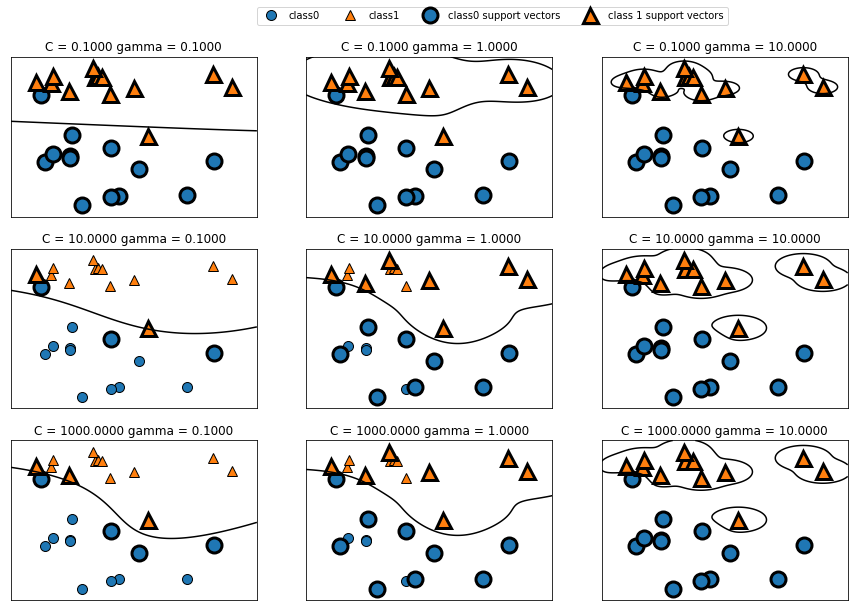

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
# 3행 3열의 서브플롯 figsize=(15,10)
fig, axes = plt.subplots(3,3,figsize=(15,10))
# Cost: 0.1,10,1000
# gamma : 0.1,1,10
for ax , C in zip(axes,[-1,1,3]):
    for a,gamma in zip(ax,[-1,0,1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)
        
axes[0,0].legend(['class0','class1','class0 support vectors',
                 'class 1 support vectors'],ncol=4,loc=(1,1.2))

#cost 크면 복잡한 모형 (과적합)
#cost 작으면 일반적인 모형(과소적합)

#서포트 벡터

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


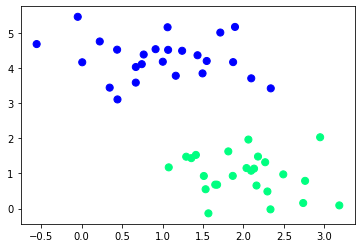

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

#랜덤데이터셋을 만드는 함수
#n_sample 샘플갯수,centers 중심좌표수,cluster_std 클러스터의 표준편차
X,y=make_blobs(n_samples=50,centers=2,random_state=0,
              cluster_std=0.6)
#산점도
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [5]:
import numpy as np
print(np.linspace(1,50))
print(np.linspace(1,50,5))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[ 1.   13.25 25.5  37.75 50.  ]


[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5]


(-1, 3.5)

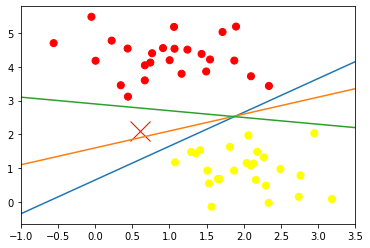

In [6]:
import numpy as np

# -1~3.5까지 10등분
xfit=np.linspace(-1,3.5,10)
print(xfit)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
#x표시한 샘플의 분류 방법
plt.plot([0.6],[2.1],'x',color='red',markersize=20)

#기울기와 절편에 따라 구분선이 달라짐
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b)
    
plt.xlim(-1,3.5)

In [10]:
from sklearn.svm import SVC
#svm 모형
model = SVC(kernel='linear',C=0.1)
#기계학습
model.fit(X,y)
#kernel='linear' 커널함수, 선형분류에 적합한 함수
#kernel='rbf' 비선형분류에 적합한 함수(기본값)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
model.support_vectors_ #모형에서 만든 서포트 벡터의 좌표값

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

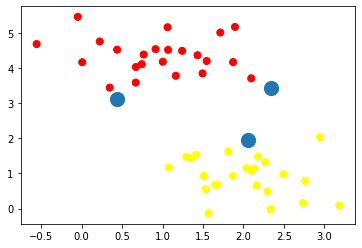

In [12]:
#산점도 그리기
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
#서포트 벡터
plt.scatter(model.support_vectors_[:,0],
           model.support_vectors_[:,1],s=200)

In [13]:
#정방행렬을 만드는 함수
a,b = np.meshgrid([10,20],[30,40])
print(a)
print(b)
print(a.ravel())
print(b.ravel())
print(np.vstack([a.ravel(),b.ravel()]))
#ravel() 행렬을 1차원 배열로 만드는 함수
#vstack([A,B]) A,B 배열을 세로로 연결시키는 함수
#행렬.T => 행렬전치(Transposin Arrays and Swapping Axes)
c=np.vstack([a.ravel(), b.ravel()]).T
print(c)

[[10 20]
 [10 20]]
[[30 30]
 [40 40]]
[10 20 10 20]
[30 30 40 40]
[[10 20 10 20]
 [30 30 40 40]]
[[10 30]
 [20 30]
 [10 40]
 [20 40]]


In [14]:
a=np.array([[10,20,30],[40,50,60]]) #2행3열의 2차원 넘파이배열
print(a.shape)
b=a.reshape(3,2) #2행 3열을 3행 2열로 변환
print(a)
print(b)
print(b.shape)

(2, 3)
[[10 20 30]
 [40 50 60]]
[[10 20]
 [30 40]
 [50 60]]
(3, 2)


In [15]:
#서포트 벡터 그래프 함수
def plot_svc(model,ax=None):
    if ax==None:
        ax=plt.gca()
    xlim=ax.get_xlim() #x축범위
    ylim=ax.get_ylim() #y축범위
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x) #정방행렬
    xy=np.vstack([X.ravel(),Y.ravel()]).T #행렬전치
    
    P=model.decision_function(xy).reshape(X.shape) #차원변경
    #등고선 그리기 함수
    ax.contour(X,Y,P,
              levels=[-1,0,1],colors='k',
              linestyles=['--','-','--']) #점선, 실선 점산
    #서포트 벡터 표시
    ax.scatter(model.support_vectors_[:,0],
              model.support_vectors_[:,1],s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

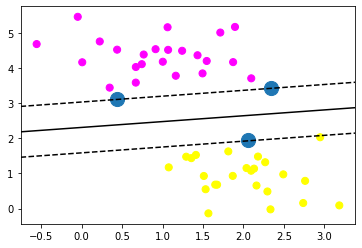

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
plot_svc(model)

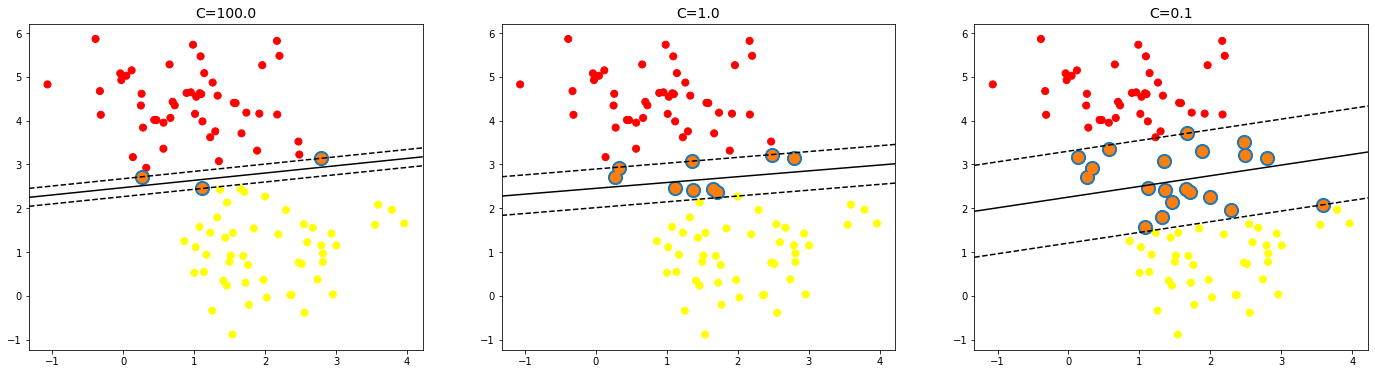

In [19]:
#cost 값의 변화에 따른 svm 모형 그래프
X,y = make_blobs(n_samples=100, centers=2,
                random_state=0, cluster_std=0.8)

fig, ax=plt.subplots(1,3,figsize=(24,6))

for axi, cost in zip(ax, [100,1,0.1]):
    model= SVC(kernel='linear',C=cost).fit(X,y) #선형 svm
    axi.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn') #선형도
    plot_svc(model,axi) #구분선과 서포트벡터 그래프
    #서포트 벡터 표시
    axi.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=50,lw=4)
    #그래프의 타이틀
    axi.set_title('C={0:.1f}'.format(cost),size=14)

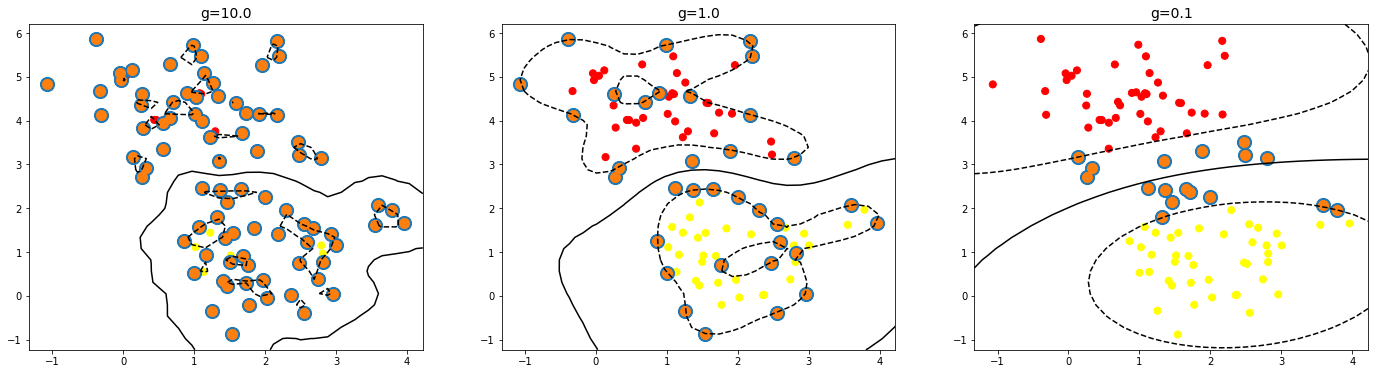

In [21]:
#gamma 값의 변화에 따른 svm 모형 그래프
X,y = make_blobs(n_samples=100, centers=2,
                random_state=0, cluster_std=0.8)

fig, ax=plt.subplots(1,3,figsize=(24,6))
#gamma 10,1,0.1
for axi, g in zip(ax, [10,1,0.1]):
    model= SVC(kernel='rbf',gamma=g).fit(X,y) #선형 svm
    axi.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn') #선형도
    plot_svc(model,axi) #구분선과 서포트벡터 그래프
    #서포트 벡터 표시
    axi.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=50,lw=4)
    #그래프의 타이틀
    axi.set_title('g={:.1f}'.format(g),size=14)

#gamma가 작으면 영향력을 행사하는 거리가 길어지고
#gamma가 크면 영향력을 행사하는 거리가 짧아짐